In [141]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

As I will be working with more datasets this time, I will create functions for the initial exploration of the datasets following python good practices.

In [142]:
def get_dataframe_size(df):
    return df.shape

def describe_dataframe(df):
    return df.describe()

def display_head(df, n=5):
    return df.head(n)

def display_tail(df, n=5):
    return df.tail(n)

def get_dataframe_total_elements(df):
    return df.size

def print_dataframe_info(df):
    df.info()

def count_duplicated_rows(df):
    return df.duplicated().sum()

def count_nan_values(df):
    return df.isnull().sum()





In [143]:
def read_csv_file(file_path):
    try:
        df = pd.read_csv(file_path)
        return df
    except FileNotFoundError:
        print(f"Error: File not found at '{file_path}'")
        return None
    except Exception as e:
        print(f"An error occurred while reading the CSV file: {str(e)}")
        return None

In [172]:
# bus_services_df = pd.read_csv('TOA16.20231203T111234.csv')
bus_services_df = read_csv_file('TOA16.20231203T111234.csv')

In [145]:
# bus_services_df.head()
display_head(bus_services_df)

,Statistic Label,Year,Scheduled services,UNIT,VALUE
0,Passengers,2011,Dublin city services,Number (000),116958.0
1,Passengers,2011,Provincial city and town services,Number (000),16389.0
2,Passengers,2011,Other scheduled services,Number (000),20112.0
3,Passengers,2011,School transport scheme,Number (000),41814.0
4,Passengers,2012,Dublin city services,Number (000),115198.0


In [146]:
# bus_services_size = bus_services_df.size
get_dataframe_size(bus_services_df)

(96, 5)

In [147]:
print(f'Total number of elements in the DataFrame: {get_dataframe_total_elements(bus_services_df)}')

Total number of elements in the DataFrame: 480


In [148]:
print_dataframe_info(bus_services_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Statistic Label     96 non-null     object 
 1   Year                96 non-null     int64  
 2   Scheduled services  96 non-null     object 
 3   UNIT                96 non-null     object 
 4   VALUE               84 non-null     float64
dtypes: float64(1), int64(1), object(3)
memory usage: 3.9+ KB


In [149]:
describe_dataframe(bus_services_df)

,Year,VALUE
count,96.000000,84.000000
mean,2016.500000,46097.047619
std,3.470174,36166.611880
min,2011.000000,7664.000000
25%,2013.750000,17977.750000
50%,2016.500000,41078.000000
75%,2019.250000,64506.500000
max,2022.000000,143104.000000


In [150]:
unique_statistic_labels = bus_services_df['Statistic Label'].unique()
unique_services = bus_services_df['Scheduled services'].unique()
unique_units = bus_services_df['UNIT'].unique()

unique_statistic_labels, unique_services, unique_units

(array(['Passengers', 'Vehicle kilometers'], dtype=object),
 array(['Dublin city services', 'Provincial city and town services',
        'Other scheduled services', 'School transport scheme'],
       dtype=object),
 array(['Number (000)', 'km (000)'], dtype=object))

Categorical Data Analysis:
Statistic Labels: Two categories - 'Passengers' and 'Vehicle kilometers'.
Scheduled Services: Four types - 'Dublin city services', 'Provincial city and town services', 'Other scheduled services', 'School transport scheme'.
Units: Two units - 'Number (000)' and 'km (000)'.

Since the data includes multiple types of measurements - passengers and kilometers, it's important to handle these different units appropriately when analyzing and visualizing. 

In [151]:
def convert_to_millions(value_in_thousands):
    return value_in_thousands / 1000

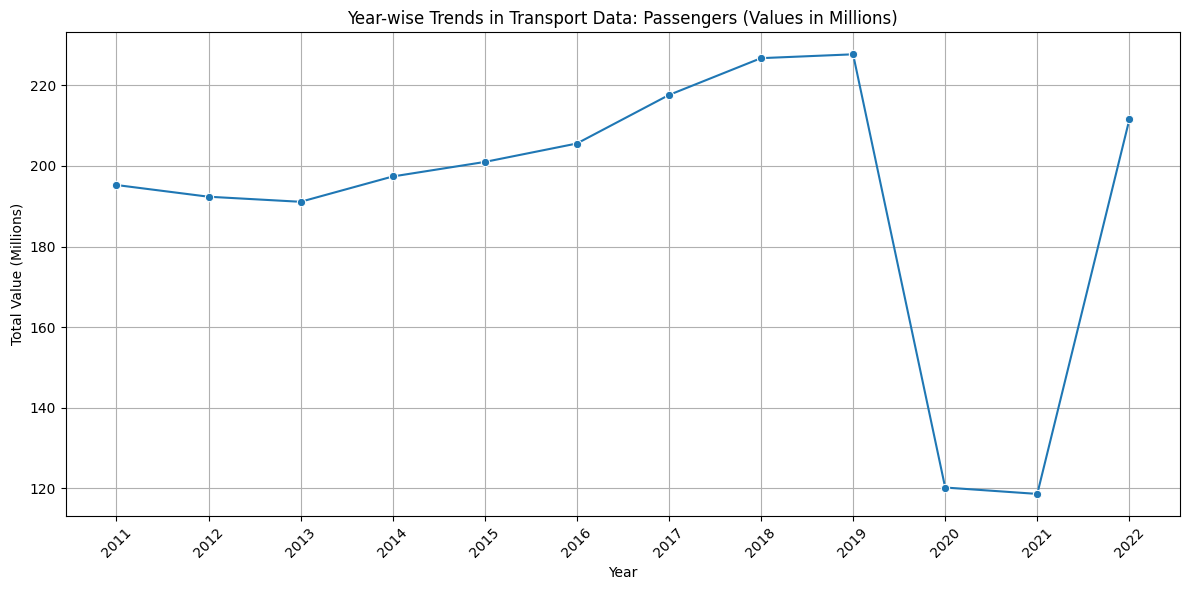

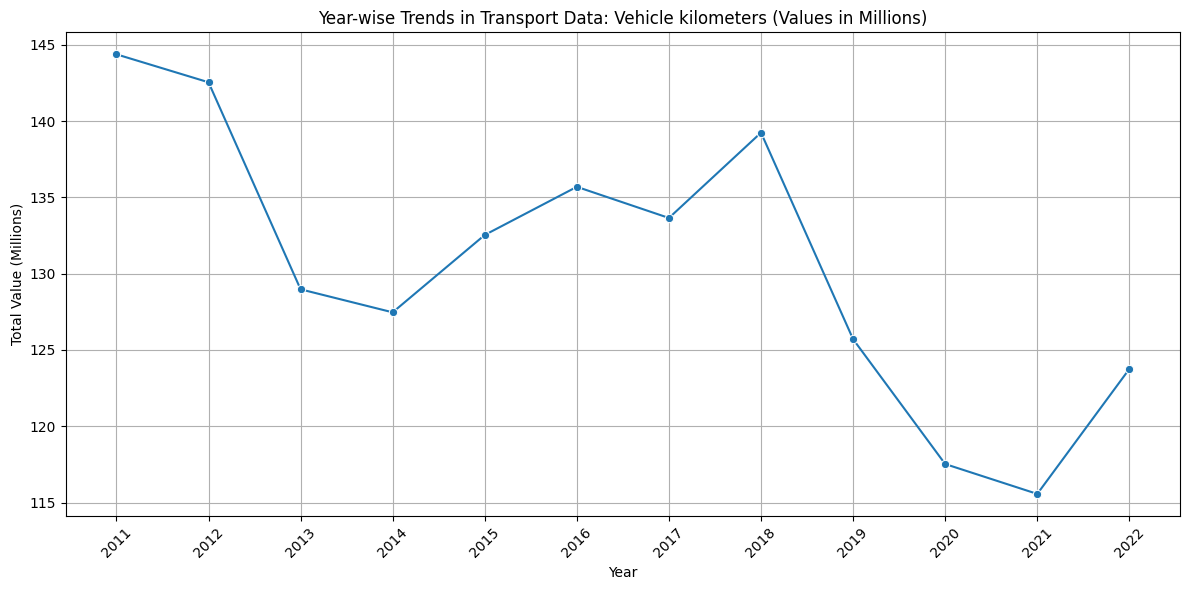

In [152]:
# Creating separate visualizations for each 'Statistic Label' after conversion
for label in bus_services_df['Statistic Label'].unique():
    subset = bus_services_df[bus_services_df['Statistic Label'] == label]
    year_wise_data = subset.groupby('Year')['VALUE'].sum().apply(convert_to_millions)

    # Visualization of year-wise trends for each 'Statistic Label'
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=year_wise_data, marker='o')
    plt.title(f'Year-wise Trends in Transport Data: {label} (Values in Millions)')
    plt.ylabel('Total Value (Millions)')
    plt.xlabel('Year')
    plt.grid(True)
    plt.xticks(year_wise_data.index, rotation=45)
    plt.tight_layout()
    plt.show()


Data Cleaning and checking for duplicates

In [153]:
# population_duplicates = bus_services_df.duplicated().sum()
# print(f"Number of duplicate rows in the population dataset is {population_duplicates}.")

print(f'Number of duplicate rows in the dataset: {count_duplicated_rows(bus_services_df)}.')
      

Number of duplicate rows in the dataset: 0.


In [154]:
# missing_data = bus_services_df.isnull().sum()
# missing_data

count_nan_values(bus_services_df)

Statistic Label        0
Year                   0
Scheduled services     0
UNIT                   0
VALUE                 12
dtype: int64

In [155]:
missing_data_rows = bus_services_df[bus_services_df.isnull().any(axis=1)]

missing_data_rows

,Statistic Label,Year,Scheduled services,UNIT,VALUE
51,Vehicle kilometers,2011,School transport scheme,km (000),NaN
55,Vehicle kilometers,2012,School transport scheme,km (000),NaN
59,Vehicle kilometers,2013,School transport scheme,km (000),NaN
63,Vehicle kilometers,2014,School transport scheme,km (000),NaN
67,Vehicle kilometers,2015,School transport scheme,km (000),NaN
71,Vehicle kilometers,2016,School transport scheme,km (000),NaN
75,Vehicle kilometers,2017,School transport scheme,km (000),NaN
79,Vehicle kilometers,2018,School transport scheme,km (000),NaN
83,Vehicle kilometers,2019,School transport scheme,km (000),NaN
87,Vehicle kilometers,2020,School transport scheme,km (000),NaN


Observations:

Pattern of Missing Data: All missing values are in the 'VALUE' column for 'Vehicle kilometers' related to the 'School transport scheme'.
Consistency Across Years: This missing data is consistently observed across all years in the dataset for this particular category.

Choosing to exclude the rows with missing data is a valid approach, especially if the missing data pertains to a specific segment that is not central to your analysis, or if imputation could introduce significant bias or inaccuracies. In this case, since the missing values are all related to 'Vehicle kilometers' for the 'School transport scheme' across various years, excluding these rows should have a limited impact on analyses focusing on other aspects of the dataset.

In [156]:
bus_services_df = bus_services_df.dropna()

In [157]:
bus_services_df

,Statistic Label,Year,Scheduled services,UNIT,VALUE
0,Passengers,2011,Dublin city services,Number (000),116958.0
1,Passengers,2011,Provincial city and town services,Number (000),16389.0
2,Passengers,2011,Other scheduled services,Number (000),20112.0
3,Passengers,2011,School transport scheme,Number (000),41814.0
4,Passengers,2012,Dublin city services,Number (000),115198.0
...,...,...,...,...,...
89,Vehicle kilometers,2021,Provincial city and town services,km (000),13967.0
90,Vehicle kilometers,2021,Other scheduled services,km (000),58845.0
92,Vehicle kilometers,2022,Dublin city services,km (000),46172.0
93,Vehicle kilometers,2022,Provincial city and town services,km (000),13918.0


In [158]:
# bus_services_df_info = bus_services_df.info()
# bus_services_df_head = bus_services_df.head()

# bus_services_df_info, bus_services_df_head


print_dataframe_info(bus_services_df)
display_head(bus_services_df)

<class 'pandas.core.frame.DataFrame'>
Index: 84 entries, 0 to 94
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Statistic Label     84 non-null     object 
 1   Year                84 non-null     int64  
 2   Scheduled services  84 non-null     object 
 3   UNIT                84 non-null     object 
 4   VALUE               84 non-null     float64
dtypes: float64(1), int64(1), object(3)
memory usage: 3.9+ KB


,Statistic Label,Year,Scheduled services,UNIT,VALUE
0,Passengers,2011,Dublin city services,Number (000),116958.0
1,Passengers,2011,Provincial city and town services,Number (000),16389.0
2,Passengers,2011,Other scheduled services,Number (000),20112.0
3,Passengers,2011,School transport scheme,Number (000),41814.0
4,Passengers,2012,Dublin city services,Number (000),115198.0


Number of Entries: Reduced to 84 rows (from the original 96).
Columns: Still consists of 5 columns - 'Statistic Label', 'Year', 'Scheduled services', 'UNIT', and 'VALUE'.
Data Types: Remain the same, with no missing values in any column.

Data segmentation involves dividing the dataset into meaningful subsets for more targeted analysis. The segmentation can be based on 'Statistic Label', 'Scheduled services', and 'UNIT'. This will allow us to analyze trends and patterns within each specific category and service type, providing more detailed and context-specific insights.

In [159]:
# Identifying unique categories for segmentation
unique_statistic_labels = bus_services_df['Statistic Label'].unique()
unique_services = bus_services_df['Scheduled services'].unique()

# Creating a dictionary to store segmented datasets
segmented_datasets = {}

for label in unique_statistic_labels:
    for service in unique_services:
        # Creating a subset for each combination of statistic label and service
        subset = bus_services_df[(bus_services_df['Statistic Label'] == label) & (bus_services_df['Scheduled services'] == service)]
        # Storing the subset in the dictionary if it's not empty
        if not subset.empty:
            segmented_datasets[f"{label}_{service}"] = subset

# Displaying the keys of the dictionary to show the created segments
segmented_datasets.keys()


dict_keys(['Passengers_Dublin city services', 'Passengers_Provincial city and town services', 'Passengers_Other scheduled services', 'Passengers_School transport scheme', 'Vehicle kilometers_Dublin city services', 'Vehicle kilometers_Provincial city and town services', 'Vehicle kilometers_Other scheduled services'])

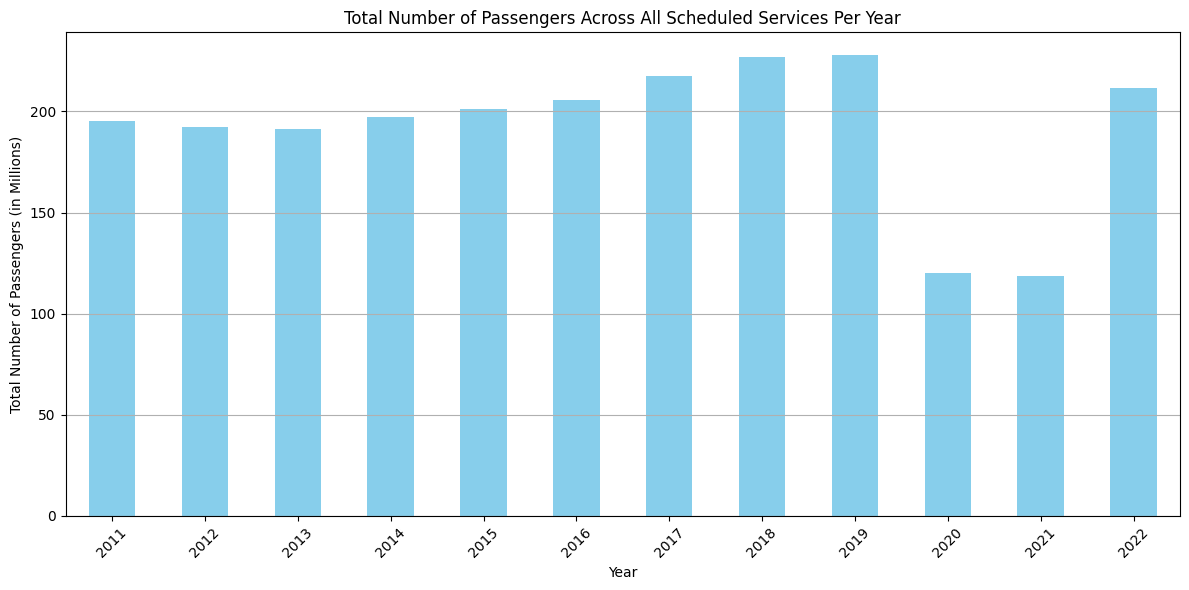

In [160]:
total_passengers_per_year = bus_services_df[bus_services_df['Statistic Label'] == 'Passengers'].groupby('Year')['VALUE'].sum().apply(convert_to_millions)

# Visualization using a bar chart
plt.figure(figsize=(12, 6))
total_passengers_per_year.plot(kind='bar', color='skyblue')
plt.title('Total Number of Passengers Across All Scheduled Services Per Year')
plt.xlabel('Year')
plt.ylabel('Total Number of Passengers (in Millions)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()

plt.show()

In [161]:
bus_services_df

,Statistic Label,Year,Scheduled services,UNIT,VALUE
0,Passengers,2011,Dublin city services,Number (000),116958.0
1,Passengers,2011,Provincial city and town services,Number (000),16389.0
2,Passengers,2011,Other scheduled services,Number (000),20112.0
3,Passengers,2011,School transport scheme,Number (000),41814.0
4,Passengers,2012,Dublin city services,Number (000),115198.0
...,...,...,...,...,...
89,Vehicle kilometers,2021,Provincial city and town services,km (000),13967.0
90,Vehicle kilometers,2021,Other scheduled services,km (000),58845.0
92,Vehicle kilometers,2022,Dublin city services,km (000),46172.0
93,Vehicle kilometers,2022,Provincial city and town services,km (000),13918.0


In [162]:
import plotly.express as px

# Assuming 'bus_services_df' is your DataFrame
# Filtering only passenger data and aggregating the total number of passengers for each year
# Then, converting the values to millions
total_passengers_per_year_millions = bus_services_df[bus_services_df['Statistic Label'] == 'Passengers'].groupby('Year')['VALUE'].sum().apply(convert_to_millions)

# Creating an interactive bar chart using Plotly
fig = px.bar(total_passengers_per_year_millions, 
             x=total_passengers_per_year_millions.index, 
             y=total_passengers_per_year_millions, 
             labels={'y': 'Total Number of Passengers (Millions)', 'x': 'Year'},
             title='Total Number of Passengers Across All Scheduled Services Per Year (in Millions)')

# Customizing the hover text
fig.update_traces(hovertemplate='Year: %{x}<br>Number of Bus Passengers: %{y:.0f}M', 
                  marker_color='skyblue', marker_line_color='blue',
                  marker_line_width=1.5, opacity=0.8)
fig.update_layout(
    showlegend=False, 
    hovermode='x',
    xaxis_tickangle=-45,  # Tilting the x-axis labels for better visibility
    xaxis=dict(
        tickmode='linear',  # Ensuring all years are included
        type='category'     # Treating years as discrete categories
    )
)

# Display the figure
fig.show()


FOCUS ON DUBLIN CITY SERVICES

**FIX FORMAT**

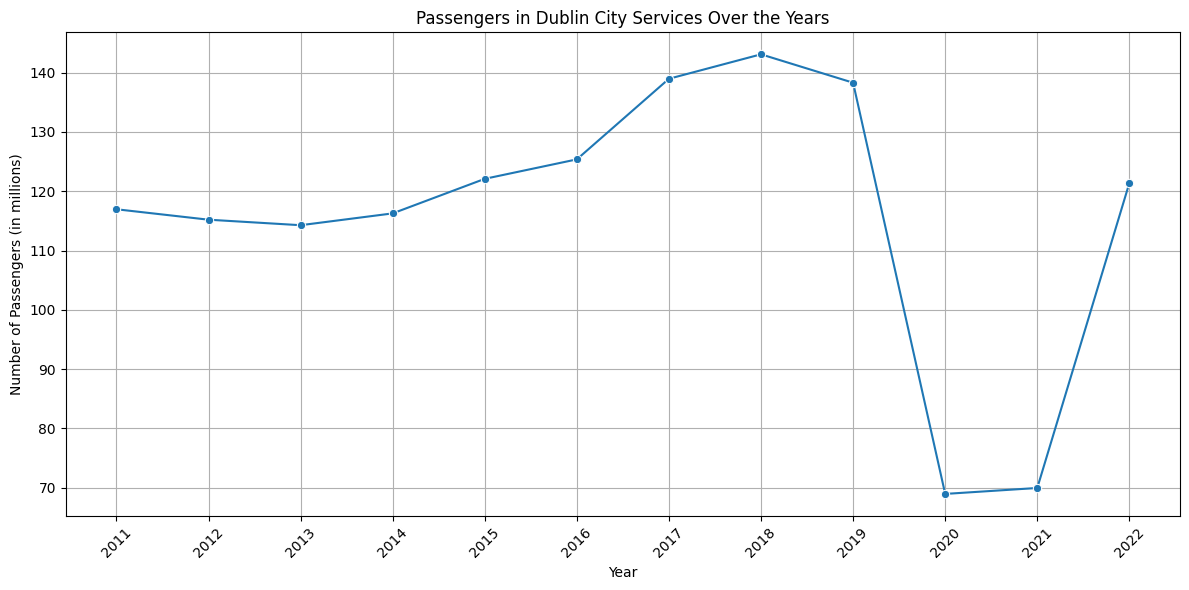

(              Year       VALUE
 count    12.000000   12.000000
 mean   2016.500000  115.898583
 std       3.605551   23.850447
 min    2011.000000   68.927000
 25%    2013.750000  114.965500
 50%    2016.500000  119.168000
 75%    2019.250000  128.610500
 max    2022.000000  143.104000,
 None)

In [163]:
segment_1 = segmented_datasets['Passengers_Dublin city services']
segment_1.loc[:, 'VALUE'] = segment_1['VALUE'].apply(convert_to_millions)
# segment_1['VALUE'] = segment_1['VALUE'].apply(convert_to_millions) as I received the following warning using this line - A value is trying to be set on a copy of a slice from a DataFrame.
#Try using .loc[row_indexer,col_indexer] = value instead

# Visualization for "Passengers_Dublin city services"
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='VALUE', data=segment_1, marker='o')
plt.title('Passengers in Dublin City Services Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Passengers (in millions)')
plt.grid(True)
plt.xticks(segment_1['Year'].unique(), rotation=45)
plt.tight_layout()

plt.show()

In [164]:
segment_1

,Statistic Label,Year,Scheduled services,UNIT,VALUE
0,Passengers,2011,Dublin city services,Number (000),116.958
4,Passengers,2012,Dublin city services,Number (000),115.198
8,Passengers,2013,Dublin city services,Number (000),114.268
12,Passengers,2014,Dublin city services,Number (000),116.262
16,Passengers,2015,Dublin city services,Number (000),122.093
20,Passengers,2016,Dublin city services,Number (000),125.377
24,Passengers,2017,Dublin city services,Number (000),138.978
28,Passengers,2018,Dublin city services,Number (000),143.104
32,Passengers,2019,Dublin city services,Number (000),138.311
36,Passengers,2020,Dublin city services,Number (000),68.927


We can see a huge decrease in number of passengers during COVID. Looking at post COVID data, still we see less passengers as comapred to before. Let's compare pre covid, covid and post covid.

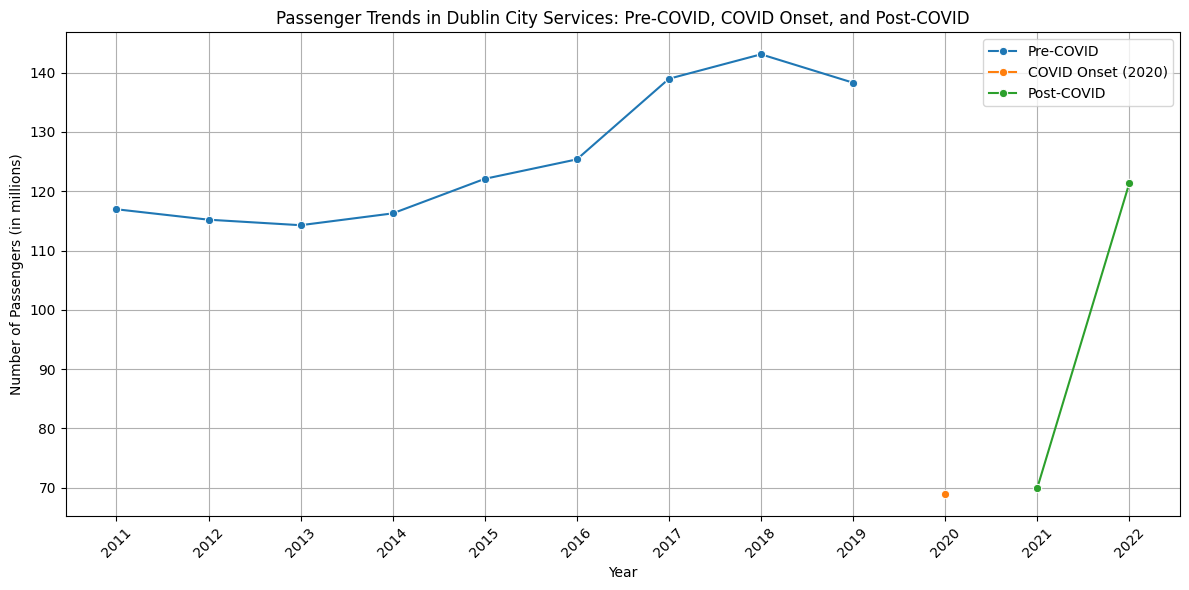

((125.61655555555555, 68.927, 95.65350000000001), None)

In [165]:
pre_covid_data = segment_1[segment_1['Year'] <= 2019]
post_covid_data = segment_1[segment_1['Year'] >= 2020]

# Calculating average passengers for each period
average_pre_covid = pre_covid_data['VALUE'].mean()
average_post_covid = post_covid_data['VALUE'].mean()


# Further segmenting the data for COVID-19 onset period
covid_onset_data = segment_1[segment_1['Year'] == 2020]
post_covid_data_revised = segment_1[segment_1['Year'] > 2020]

# Calculating average passengers for each period
average_pre_covid_revised = pre_covid_data['VALUE'].mean()
average_covid_onset = covid_onset_data['VALUE'].mean()
average_post_covid_revised = post_covid_data_revised['VALUE'].mean()

# Visualization to compare trends across different periods
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='VALUE', data=pre_covid_data, marker='o', label='Pre-COVID')
sns.lineplot(x='Year', y='VALUE', data=covid_onset_data, marker='o', label='COVID Onset (2020)')
sns.lineplot(x='Year', y='VALUE', data=post_covid_data_revised, marker='o', label='Post-COVID')
plt.title('Passenger Trends in Dublin City Services: Pre-COVID, COVID Onset, and Post-COVID')
plt.xlabel('Year')
plt.ylabel('Number of Passengers (in millions)')
plt.grid(True)
plt.xticks(segment_1['Year'].unique(), rotation=45)
plt.legend()
plt.tight_layout()

(average_pre_covid_revised, average_covid_onset, average_post_covid_revised), plt.show()


Average Number of Passengers:
Pre-COVID-19 Period (up to 2019): Approximately 125,617 (in thousands).
COVID-19 Onset Year (2020): Approximately 68,927 (in thousands).
Post-COVID-19 Period (after 2020): Approximately 95,654 (in thousands).

These trends highlight the challenges faced by the transport sector in recovering from the pandemic's impact.
It suggests a need for strategies to boost public confidence and adapt to potentially changed commuting patterns in the post-pandemic world.

Is there a relationship between number of passengers and vehicle kilometers? There should be however number of passengers shouldn't be the only factor.

In [166]:
# Extracting the "Vehicle kilometers_Dublin city services" segment
segment_vehicle_km = segmented_datasets['Vehicle kilometers_Dublin city services']

# Merging the passengers and vehicle kilometers data on 'Year'
merged_data_dublin = pd.merge(segment_1, segment_vehicle_km, on='Year', suffixes=('_passengers', '_km'))

# Calculating the correlation coefficient
correlation = merged_data_dublin[['VALUE_passengers', 'VALUE_km']].corr()

correlation


,VALUE_passengers,VALUE_km
VALUE_passengers,1.000000,0.634004
VALUE_km,0.634004,1.000000


Yes, there is correlation, however this is not the only factor. 

## **LUAS**

In [185]:
# luas_passenger_numbers = pd.read_csv('TOA11.20231203T151248.csv')

luas_passenger_df = read_csv_file('TOA11.20231203T151248.csv')

In [174]:
display_head(luas_passenger_df)

,Statistic Label,Year,Month,UNIT,VALUE
0,Red line,2018,January,Number,1664495
1,Red line,2018,February,Number,1657562
2,Red line,2018,March,Number,1661098
3,Red line,2018,April,Number,1794424
4,Red line,2018,May,Number,1934553


In [175]:
display_tail(luas_passenger_df)

,Statistic Label,Year,Month,UNIT,VALUE
115,Green line,2022,August,Number,1547295
116,Green line,2022,September,Number,1830015
117,Green line,2022,October,Number,2063739
118,Green line,2022,November,Number,2097731
119,Green line,2022,December,Number,1972696


In [176]:
get_dataframe_size(luas_passenger_df)

(120, 5)

In [181]:
print(f'Total number of elements in the DataFrame: {get_dataframe_total_elements(luas_passenger_df)}')

Total number of elements in the DataFrame: 600


In [178]:
print_dataframe_info(luas_passenger_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Statistic Label  120 non-null    object
 1   Year             120 non-null    int64 
 2   Month            120 non-null    object
 3   UNIT             120 non-null    object
 4   VALUE            120 non-null    int64 
dtypes: int64(2), object(3)
memory usage: 4.8+ KB


In [179]:
describe_dataframe(luas_passenger_df)

,Year,VALUE
count,120.000000,1.200000e+02
mean,2020.000000,1.395912e+06
std,1.420143,6.137619e+05
min,2018.000000,8.935800e+04
25%,2019.000000,8.437028e+05
50%,2020.000000,1.555940e+06
75%,2021.000000,1.912537e+06
max,2022.000000,2.277974e+06


In [182]:
count_duplicated_rows(luas_passenger_df)

0

In [183]:
count_nan_values(luas_passenger_df)

Statistic Label    0
Year               0
Month              0
UNIT               0
VALUE              0
dtype: int64

In [207]:
def millions_formatter(x, pos):
    return f'{x / 1e6:.0f}M'

<Figure size 1200x800 with 0 Axes>

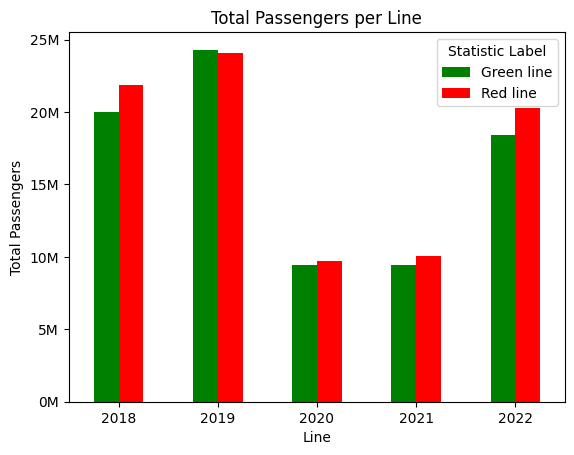

In [208]:
from matplotlib.ticker import FuncFormatter

# Group data by 'Statistic' and calculate the sum of passengers for each line
line_passengers = luas_passenger_df.groupby(['Year', 'Statistic Label'])['VALUE'].sum().unstack()

# Create a bar chart
plt.figure(figsize=(12, 8))
ax = line_passengers.plot(kind='bar', color=['green', 'red'])
plt.title('Total Passengers per Line')
plt.xlabel('Line')
plt.ylabel('Total Passengers')
plt.gca().yaxis.set_major_formatter(FuncFormatter(millions_formatter))
plt.xticks(rotation=0)
plt.show()

Same behaviour is present for the LUAS as well - during covid there is a huge increase in the passengers. We can see that the red line is usually having more passengers than the green one, with exception in 2019. 

## I think we will have to merge all those data frames - the bus one, the luas one and the one about trains and based on those show the percentage of passengets per transport. Also maybe show the % change for previous years.